In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists

from helpers import get_anchors_and_scores_mean_curve, convert_table2, remove_rows_with_nan_or_inf, load_from_parts, remove_bad_fits, failed_fits_statistics,  prepare_total_dataframe, plot_data2, plot_trn_data2, plot_prediction2, plot_prediction_smooth2, get_fun_model_id, get_XY2, load_from_parts_example, load_from_parts_example_gathered_result
from fit3_students import  get_multiple_extrapolations_mean_curve_robust, df_compute_metrics_mean_curve
from models import Models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Preprocessing
The data was spread over multiple files. Here, we load the different dataframes and combine them into 1 big dataframe called ``df_total``.

In [2]:

!python --version
!mpiexec -n 1 python fit3_students.py
%cf2) C:\Users\dongh\Downloads\analysis>mpiexec -n 12 python -W ignore curve_fitting.py

Python 3.10.4
^C


UsageError: Line magic function `%cf2)` not found.


In [287]:
[df_anchors_and_scores, df_metrics, df_extrapolations] = load_from_parts_example()

In [288]:
df_total2 = prepare_total_dataframe(df_anchors_and_scores, df_metrics, df_extrapolations)

  0%|          | 0/5 [00:00<?, ?it/s]

In [143]:
df_total2

,openmlid,learner,max_anchor_seen,prediction,beta,fails_init,fails_fit,MSE_trn,MSE_tst,MSE_tst_last,L1_trn,L1_tst,L1_tst_last,n,curve_model,anchor_prediction,score,percentage,percentage_bucket
0,3,SVC_linear,45,"[0.6872695603586588, 0.7354313620358442, 0.780...","[0.8807922431287851, 113773.2200484405, 118.49...",0.0,0,2.262517e-07,0.004497,7.880851e-03,2.262517e-07,0.004497,7.880851e-03,4,pow4,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.6874968, 0.7347776000000005, 0.7807, 0.8211...",0.017388,0.05
1,3,SVC_linear,64,"[0.687316837250483, 0.7355771051104896, 0.7794...","[1.005258110250112, 0.00530026744901424, 0.968...",0.0,0,6.564965e-07,0.000556,9.262469e-04,6.564965e-07,0.000556,9.262469e-04,5,pow4,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.6874968, 0.7347776000000005, 0.7807, 0.8211...",0.02473,0.05
2,3,SVC_linear,91,"[0.6874786474109584, 0.7351371809592626, 0.779...","[0.9377445091163675, 4.4311228285027034e-05, 2...",0.0,0,8.089594e-07,0.000475,1.015293e-03,8.089594e-07,0.000475,1.015293e-03,6,pow4,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.6874968, 0.7347776000000005, 0.7807, 0.8211...",0.035162,0.05
3,3,SVC_linear,128,"[0.6872911907997433, 0.7354931241621241, 0.779...","[0.9560185692854816, 0.0004779754446512285, 1....",0.0,0,8.702641e-07,0.000074,1.964005e-04,8.702641e-07,0.000074,1.964005e-04,7,pow4,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.6874968, 0.7347776000000005, 0.7807, 0.8211...",0.049459,0.05
4,3,SVC_linear,181,"[0.6870080425844733, 0.7359803555996163, 0.779...","[0.9755968758564376, 0.0022100360339565596, 1....",0.0,0,1.250014e-06,0.000031,1.478419e-05,1.250014e-06,0.000031,1.478419e-05,8,pow4,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.6874968, 0.7347776000000005, 0.7807, 0.8211...",0.069938,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876107,42810,sklearn.tree.ExtraTreeClassifier,512,"[0.560029065547264, 0.5706851957406255, 0.5789...","[0.6227278283931332, -9.184597914068714, -0.56...",0.0,0,3.316475e-05,0.000105,8.197020e-05,3.316475e-05,0.000105,8.197020e-05,11,logpower3,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.552324, 0.58366, 0.5775560000000001, 0.5879...",0.158025,0.20
876108,42810,sklearn.tree.ExtraTreeClassifier,724,"[0.5617138592429535, 0.5706583795104784, 0.577...","[0.6393548498495994, -10.50736849617902, -0.38...",0.0,0,3.465686e-05,0.000019,2.177475e-07,3.465686e-05,0.000019,2.177475e-07,12,logpower3,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.552324, 0.58366, 0.5775560000000001, 0.5879...",0.223457,0.40
876109,42810,sklearn.tree.ExtraTreeClassifier,1024,"[0.5614040632538099, 0.5706310270100253, 0.578...","[0.6358446050655433, -10.243825821054315, -0.4...",0.0,0,3.215084e-05,0.000035,3.711803e-06,3.215084e-05,0.000035,3.711803e-06,13,logpower3,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.552324, 0.58366, 0.5775560000000001, 0.5879...",0.316049,0.40
876110,42810,sklearn.tree.ExtraTreeClassifier,1448,"[0.5625330544468411, 0.5708086426629879, 0.577...","[0.6488836582488224, -11.206693939983323, -0.3...",0.0,0,3.225755e-05,0.000008,6.971255e-06,3.225755e-05,0.000008,6.971255e-06,14,logpower3,"[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 5...","[0.552324, 0.58366, 0.5775560000000001, 0.5879...",0.446914,0.80


The meaning of the columns are:
- openmlid: the dataset
- learner: the learner used for the classification task (e.g. SVM, etc.)
- max_anchor_seen: the largest training set point on the averaged learning curve used for fitting the curve model
- anchor_prediction: the x-values on the learning curve (the training set sizes)
- score: the y-values on the learning curve (the accuracy of the learner), note that this is an average over multiple learning curves
- n: number of points on the curve used for fitting the learning curve model
- max_anchor_seen: the largest training set size used in curve fitting
- percentage: the percentage of points used (compared to the total on the curve) used for fitting
- percentage_bucket: a discretized version of the percentage, values are 0.05, 0.10, 0.20, 0.40, 0.80, 1.0.
- curve_model: the curve model that we attempted to fit
- fails_init: how many initial points needed to be tried during the fitting procedure
- fails_fit: how many times the fitting failed
- beta: the parameters of the best fit on the training points on the curve (out of 5 or more fitting attempts)
- MSEs: the MSE on either the training points of the curve (trn), MSE on the testing points on the curve (tst), MSE on the last point on the curve (tst last)
- L1: the same, but then for the L1 (absolute loss)

In [280]:
[df_anchors_and_scores, df_metrics, df_extrapolations] = load_from_parts_example()

In [281]:

df_total2 = prepare_total_dataframe(df_anchors_and_scores, df_metrics, df_extrapolations)

  0%|          | 0/5 [00:00<?, ?it/s]

In [124]:

import scipy.stats as st
for mmm in [ 'log2','pow2', 'pow3', 'exp3', 'pow4', 'exp4']:
    df_total13 = df_total2[df_total2['curve_model']==mmm]
    dj = np.array(df_total13[['MSE_trn']])
    print(mmm)
    #print(dj.flatten())
    #plt.hist(dj.flatten(), density=False, facecolor='g', bins=50, range=(0, 0.0025))
    #plt.title("evolutionary bound from k -cluster" \
     #   ", >0.025 is 15" )
    #plt.xlabel('error')
    #plt.ylabel('n')
    #ax = plt.gca()
    #ax.set_ylim([0, 1000])
    #plt.show()
    arr = dj.flatten()
    print(len(arr))
    print(len(arr[False ==(arr<100000000000000)]))
    arr = (arr[arr<100000000000000])

    #print(len(arr))
    #print(len(arr))
    #print(np.mean(arr))

    #print(st.t.interval(alpha=0.95, df=len(arr)-1, loc=np.mean(arr), scale=st.sem(arr)))
    (x, y) =st.t.interval(alpha=0.95, df=len(arr)-1, loc=np.mean(arr), scale=st.sem(arr))
    #print("{:3f}".format(np.mean(arr)), end='\pm ')
    #print("{:3f}".format(np.mean(arr) - x))
    print(format(np.mean(arr),'.2E'), end='\pm ')
    print(format(np.mean(arr) - x,'.2E'))
    print(format(np.mean(arr) - y,'.2E'))
# print(1.29E-04)

log2
738
0
2.22E-03\pm 2.37E-04
-2.37E-04
pow2
0
0
NAN\pm NAN
NAN
pow3
0
0
NAN\pm NAN
NAN
exp3
0
0
NAN\pm NAN
NAN
pow4
738
0
3.01E-03\pm 3.54E-04
-3.54E-04
exp4
0
0
NAN\pm NAN
NAN


C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dongh\anaconda3\envs\lcf2\lib\site-packages\numpy\core\fromnu

In [297]:
import scipy.stats as st
print(np.unique(np.array(df_total2[['learner']])))
print(np.unique(np.array(df_total2[['percentage_bucket']])))
print(np.unique(np.array(df_total2[['openmlid']])))

for idd in np.unique(np.array(df_total2[['openmlid']])):
    df_total134 = df_total2[df_total2['openmlid']==idd]
    print(np.unique(np.array(df_total134[['learner']])))

for ppp in (np.unique(np.array(df_total2[['percentage_bucket']]))):
    print(" ")
    print(ppp)
    df_total134 = df_total2[df_total2['percentage_bucket']==ppp]
    for mmm in ['log2', 'pow4']:
        df_total13 = df_total134[df_total134['curve_model']==mmm]
        dj = np.array(df_total13[['MSE_tst_last']])
        print(mmm)
        #print(dj.flatten())
        #plt.hist(dj.flatten(), density=False, facecolor='g', bins=50, range=(0, 0.0025))
        #plt.title("evolutionary bound from k -cluster" \
         #   ", >0.025 is 15" )
        #plt.xlabel('error')
        #plt.ylabel('n')
        #ax = plt.gca()
        #ax.set_ylim([0, 1000])
        #plt.show()
        arr = dj.flatten()
        #print(len(arr))
        #print(len(arr[False ==(arr<100000000000000)]))
        #arr = (arr[arr<100000000000000])

        #print(len(arr))
        #print(len(arr))
        #print(np.mean(arr))

        #print(st.t.interval(alpha=0.95, df=len(arr)-1, loc=np.mean(arr), scale=st.sem(arr)))
        #(x, y) =st.t.interval(alpha=0.95, df=len(arr)-1, loc=np.mean(arr), scale=st.sem(arr))
        #print("{:3f}".format(np.mean(arr)), end='\pm ')
        #print("{:3f}".format(np.mean(arr) - x))
        #print(len(arr[arr<0.001])/len(arr))
        #print(len(arr[arr<0.01])/len(arr))\
        #print(len(arr))
        print("{:.2f}".format(len(arr[arr<0.01])/len(arr)))


['SVC_linear' 'SVC_poly' 'SVC_rbf' 'SVC_sigmoid'
 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'
 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'
 'sklearn.ensemble.ExtraTreesClassifier'
 'sklearn.ensemble.GradientBoostingClassifier'
 'sklearn.ensemble.RandomForestClassifier'
 'sklearn.linear_model.LogisticRegression'
 'sklearn.linear_model.PassiveAggressiveClassifier'
 'sklearn.linear_model.Perceptron' 'sklearn.linear_model.RidgeClassifier'
 'sklearn.linear_model.SGDClassifier']
[0.05 0.1  0.2  0.4  0.8  1.  ]
[3 6 44 1468 41142]
 
0.05
log2
0.57
pow4
0.63
 
0.1
log2
0.69
pow4
0.82
 
0.2
log2
0.76
pow4
0.93
 
0.4
log2
0.81
pow4
0.94
 
0.8
log2
0.90
pow4
0.95
 
1.0
log2
1.00
pow4
1.00


In [306]:
for idd in np.unique(np.array(df_total2[['openmlid']])):
    df_total134 = df_total2[df_total2['openmlid']==idd]
    print('\\item {' + str(idd) + '}')
    print('\\begin{itemize}')
    for i in np.unique(np.array(df_total134[['learner']])):
        print(' \\item {' + i + '}' )
    print('\\end{itemize}')

\item {3}
\begin{itemize}
 \item {SVC_linear}
 \item {SVC_poly}
 \item {SVC_rbf}
 \item {SVC_sigmoid}
 \item {sklearn.ensemble.ExtraTreesClassifier}
 \item {sklearn.ensemble.GradientBoostingClassifier}
 \item {sklearn.ensemble.RandomForestClassifier}
 \item {sklearn.linear_model.LogisticRegression}
 \item {sklearn.linear_model.PassiveAggressiveClassifier}
 \item {sklearn.linear_model.Perceptron}
 \item {sklearn.linear_model.RidgeClassifier}
 \item {sklearn.linear_model.SGDClassifier}
\end{itemize}
\item {6}
\begin{itemize}
 \item {SVC_linear}
 \item {SVC_poly}
 \item {SVC_rbf}
 \item {SVC_sigmoid}
 \item {sklearn.discriminant_analysis.LinearDiscriminantAnalysis}
 \item {sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis}
 \item {sklearn.ensemble.ExtraTreesClassifier}
 \item {sklearn.ensemble.GradientBoostingClassifier}
 \item {sklearn.ensemble.RandomForestClassifier}
 \item {sklearn.linear_model.LogisticRegression}
 \item {sklearn.linear_model.PassiveAggressiveClassifier}
 \it

E-03\pm 1.04E-03

In [15]:


import scipy.stats as st
for m in ['pow2', 'log2', 'pow3', 'exp3', 'pow4', 'exp4']:
    df_total1 = df_total2[df_total2['curve_model']==m]
    dj = np.array(df_total1[['beta'][0]])
    npr =[]
    for mm in dj:
        npr.append( np.array(mm))
    k=0
    print(m)
    for mm in np.array(npr).T :
        print(k)
        print(np.max(mm))
        print(np.min(mm))
        print(np.median(mm))
        print(np.mean(mm))
        print(st.t.interval(alpha=0.90, df=len(mm)-1, loc=np.mean(mm), scale=st.sem(mm)))
        k+=1
    #print(np.array(npr).T)
    #print(len(dj))

pow2
0
-0.02121621063492519
-565.5548759985062
-1.0683427403164916
-2.6903935322880375
(-4.021095216022912, -1.3596918485531633)
1
0.14688034800680078
-2.1042819300807762
-0.10668011392599991
-0.1761777216404588
(-0.18844976781879788, -0.16390567546211973)
log2
0
0.10073084901513743
-0.32456257207477085
-0.07181862750432372
-0.0855026288063061
(-0.08949575738042564, -0.08150950023218657)
1
1.6750770531969081
0.007894244659703864
0.9934183293091414
0.9394029162256509
(0.9209504914844018, 0.9578553409669)
pow3
0
2990.021518758889
-76.32870775217691
1.0091208451780944
46.10047003525859
(34.68956363476585, 57.51137643575133)
1
2988.4790871992745
-76.9564584513955
0.052906139678607814
45.308701432689226
(33.90113162905006, 56.71627123632838)
2
11.1752291497439
-2.3197331283769396
0.3192547532057792
0.5576904000055067
(0.4909682862622312, 0.6244125137487823)
exp3
0
4161.610230447861
-884.376775665698
22.549569336151627
399.0650367605924
(356.36836004990386, 441.7617134712809)
1
647.585687535

In case you run into issues with ``load_from_parts()``, I've pickled the dataframe ``df_total`` for you, so you can load it if necessary:

In [81]:
#df_total.to_pickle('df_total_for_students.gz', protocol=3)

# Visualize a learning curve and the fit
Here we grab a random learning curve from the database and visualize the fit. Note that the dataframe contains accuracies, but we convert these to error rates in the plot.

visualizing the curve fit of row number 0


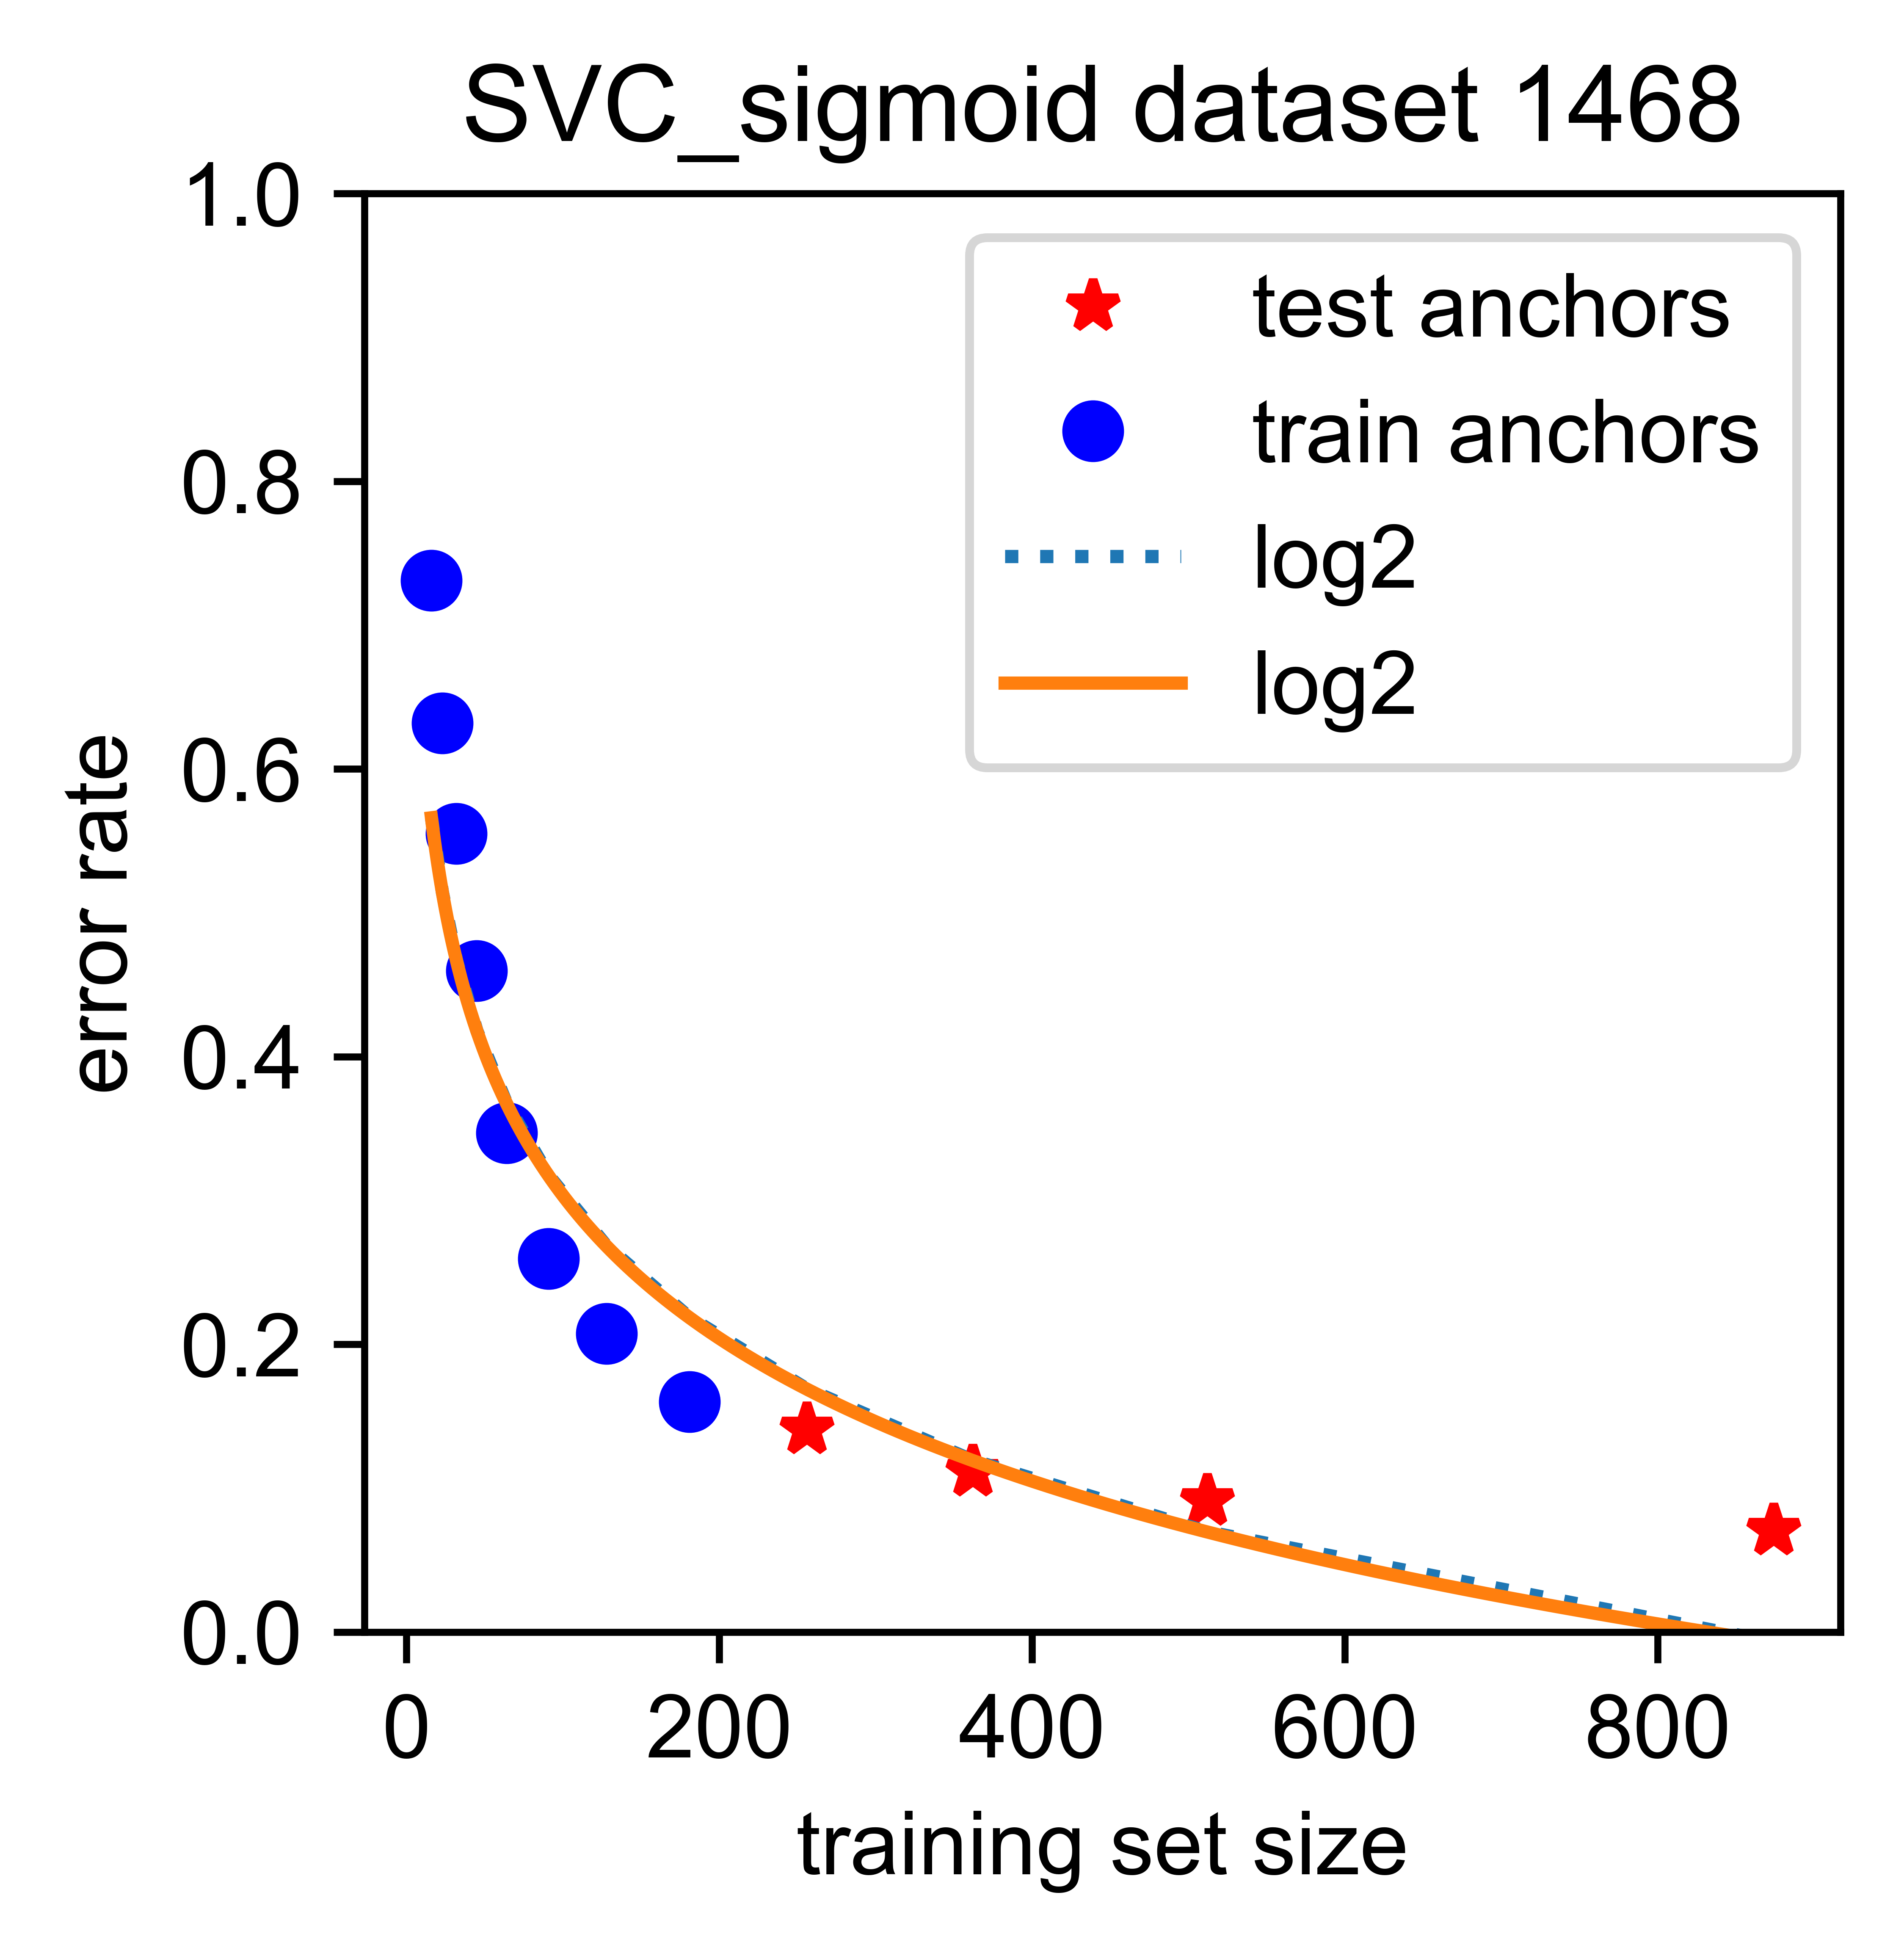

<Figure size 216x216 with 0 Axes>

openmlid                                                          1468
learner                                                    SVC_sigmoid
max_anchor_seen                                                    181
prediction           [0.4337509130004129, 0.4857423891464211, 0.533...
beta                         [-0.1432645056360339, 1.0068793720281008]
fails_init                                                    0.000258
fails_fit                                                            0
MSE_trn                                                       0.007672
MSE_tst                                                       0.001842
MSE_tst_last                                                  0.006065
L1_trn                                                        0.007672
L1_tst                                                        0.001842
L1_tst_last                                                   0.006065
n                                                                    8
curve_

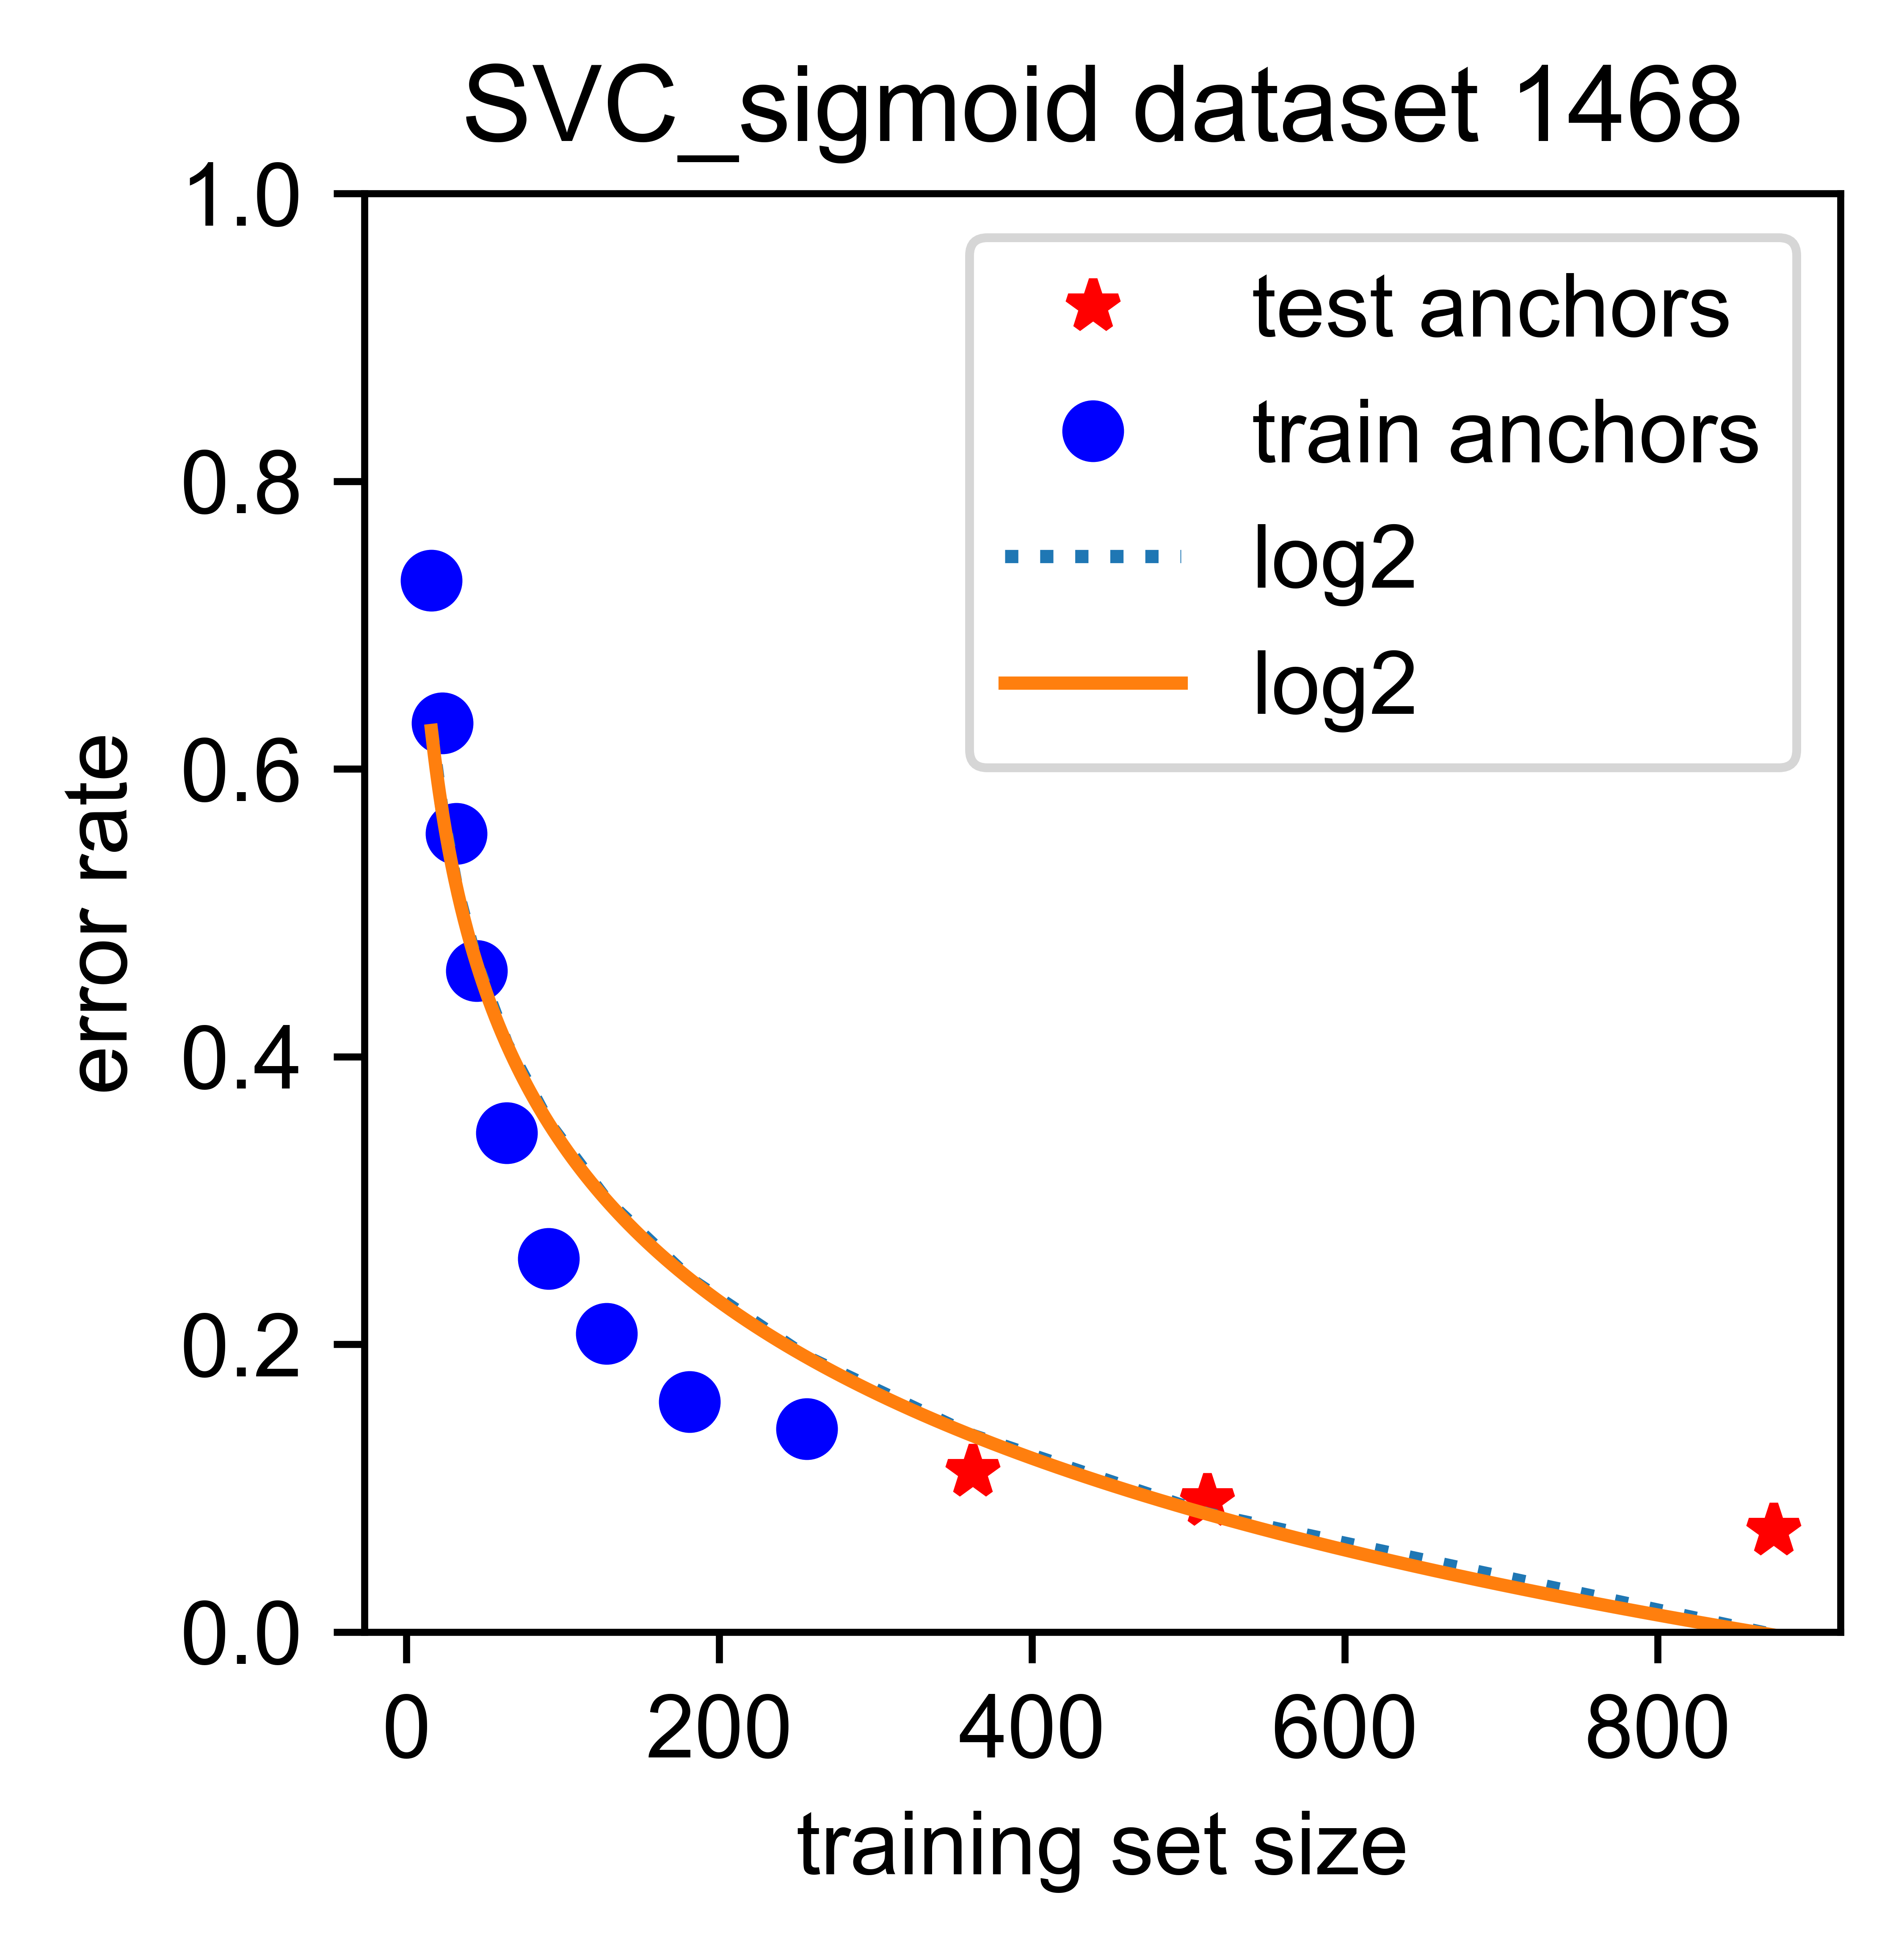

<Figure size 216x216 with 0 Axes>

openmlid                                                          1468
learner                                                    SVC_sigmoid
max_anchor_seen                                                    256
prediction           [0.37302086043166705, 0.43006649345041514, 0.4...
beta                        [-0.15719142865215655, 1.0018638587431175]
fails_init                                                    0.000195
fails_fit                                                            0
MSE_trn                                                       0.005245
MSE_tst                                                       0.002004
MSE_tst_last                                                  0.005309
L1_trn                                                        0.005245
L1_tst                                                        0.002004
L1_tst_last                                                   0.005309
n                                                                    9
curve_

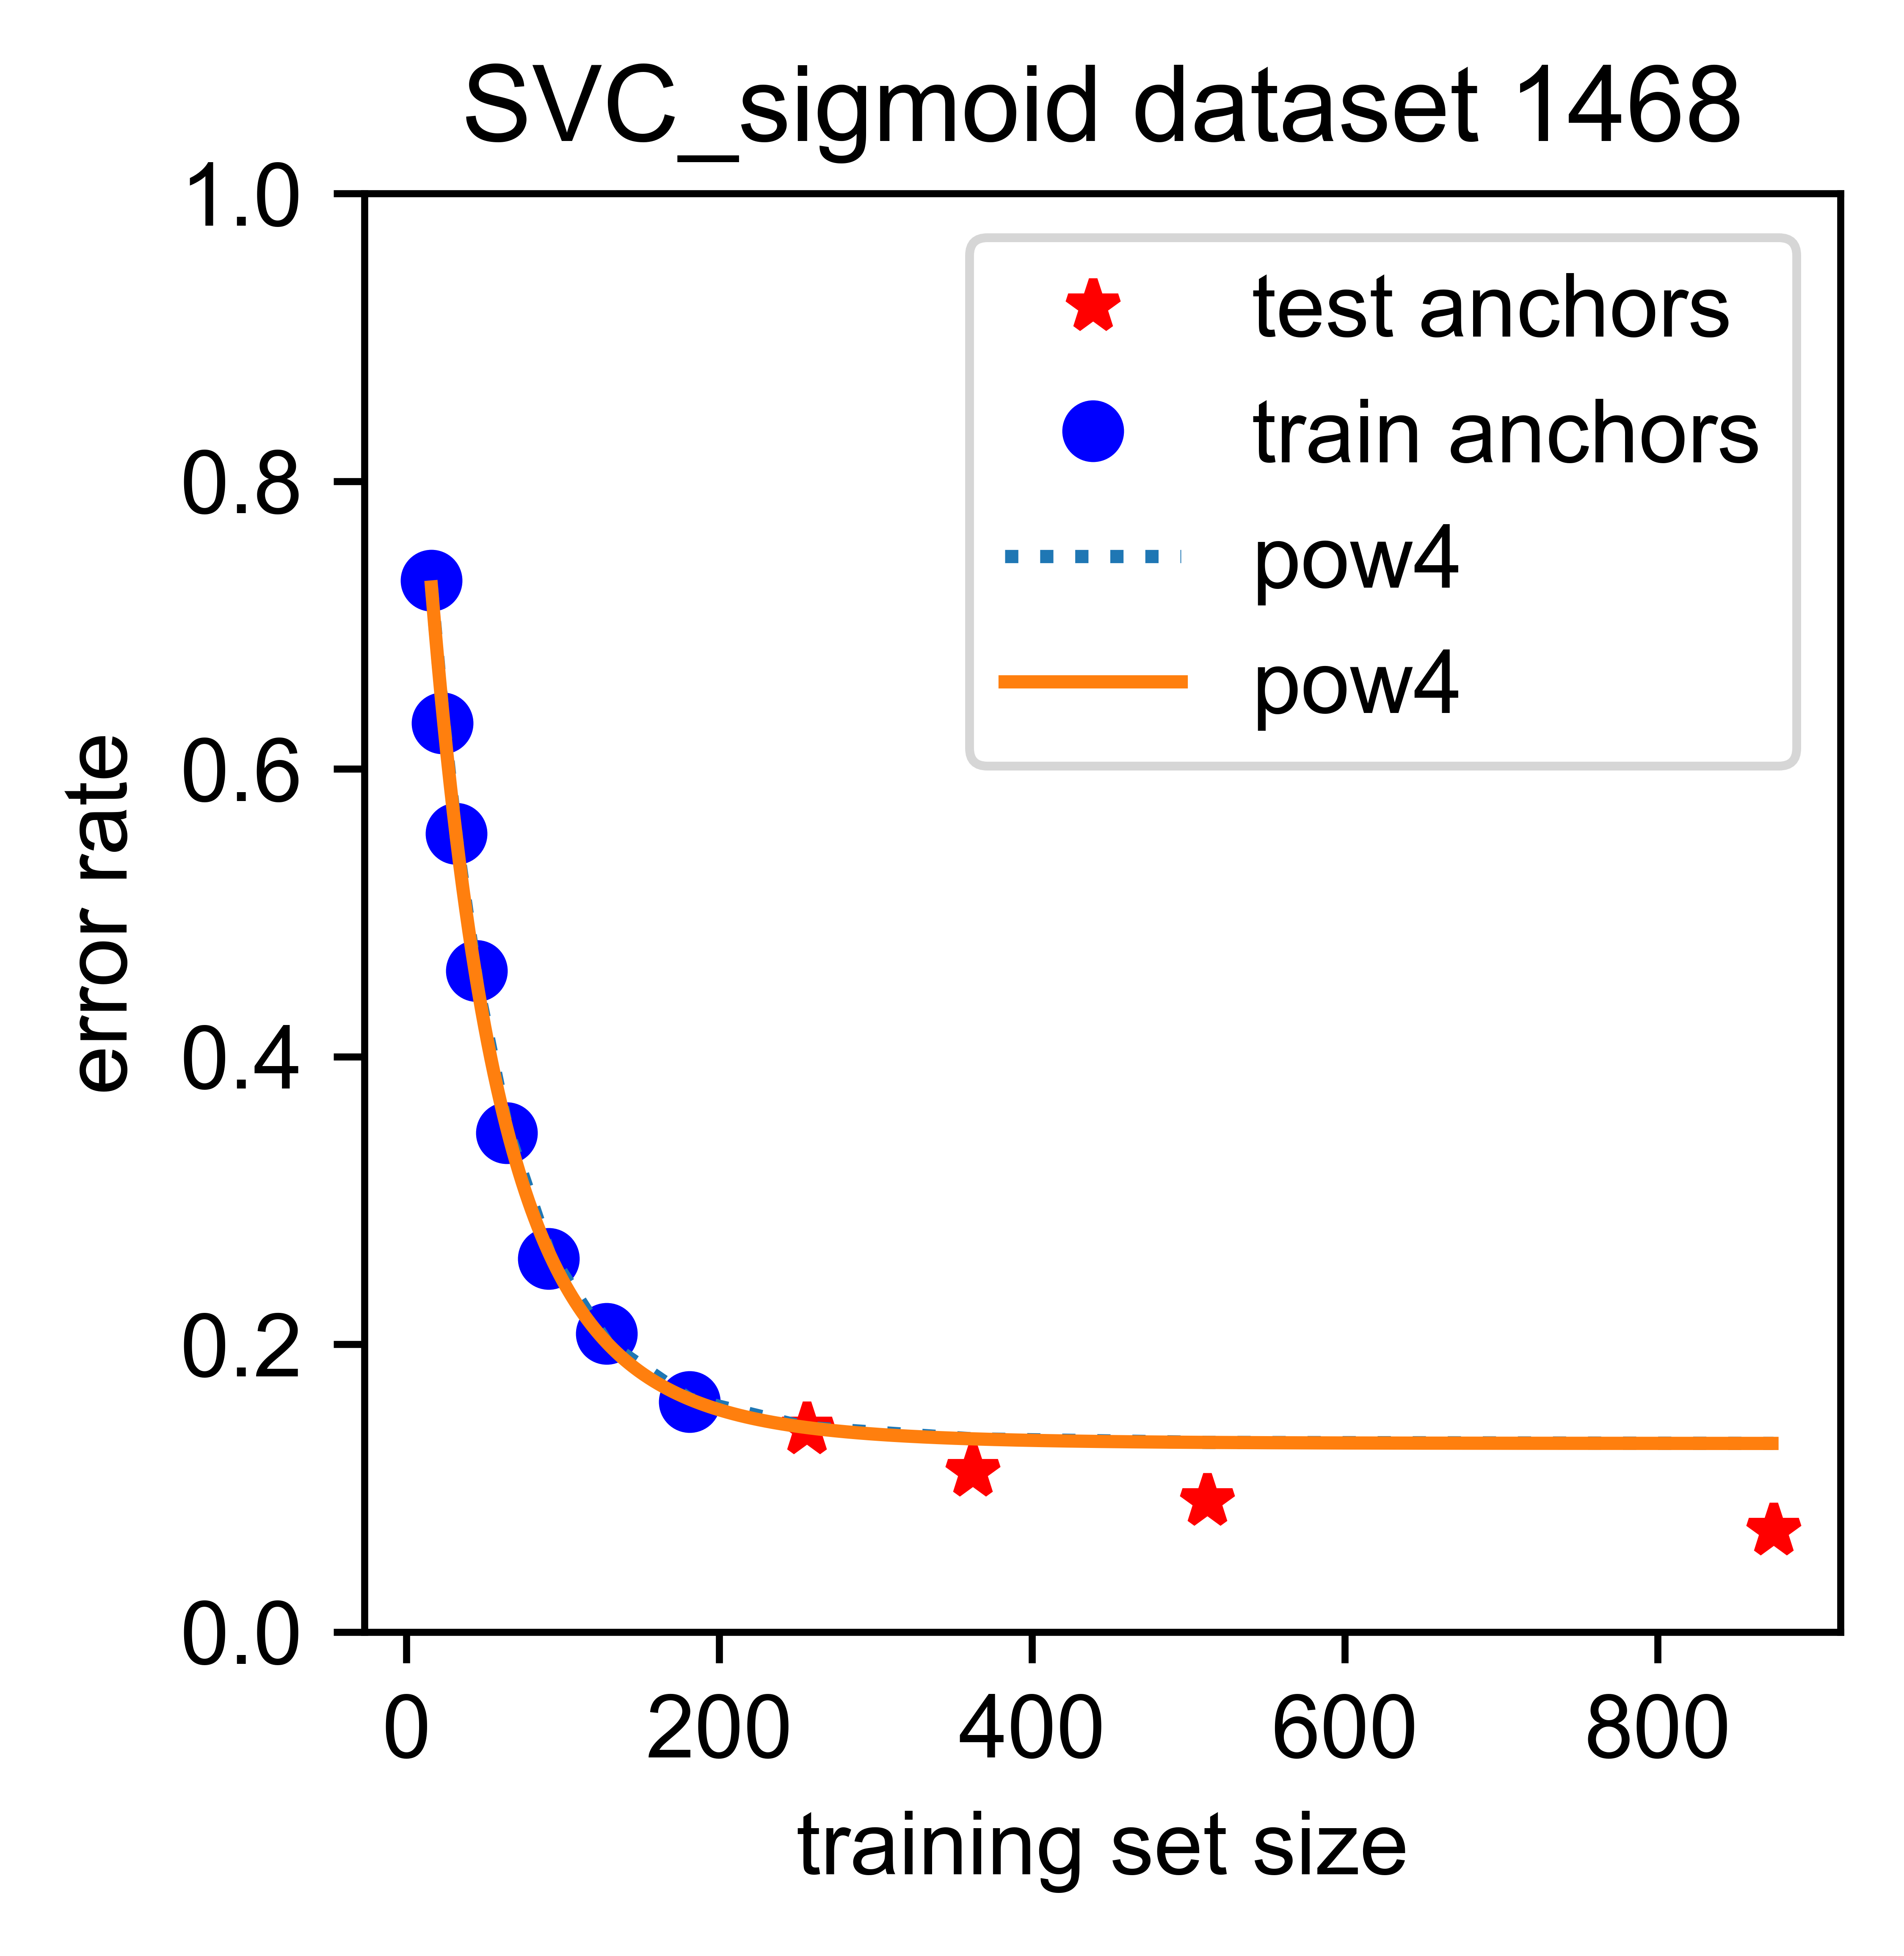

<Figure size 216x216 with 0 Axes>

openmlid                                                          1468
learner                                                    SVC_sigmoid
max_anchor_seen                                                    181
prediction           [0.27323349605007496, 0.35831518430486287, 0.4...
beta                 [0.8689234590805412, 0.00046465258791660203, 7...
fails_init                                                         0.0
fails_fit                                                            0
MSE_trn                                                       0.000032
MSE_tst                                                        0.00144
MSE_tst_last                                                  0.003616
L1_trn                                                        0.000032
L1_tst                                                         0.00144
L1_tst_last                                                   0.003616
n                                                                    8
curve_

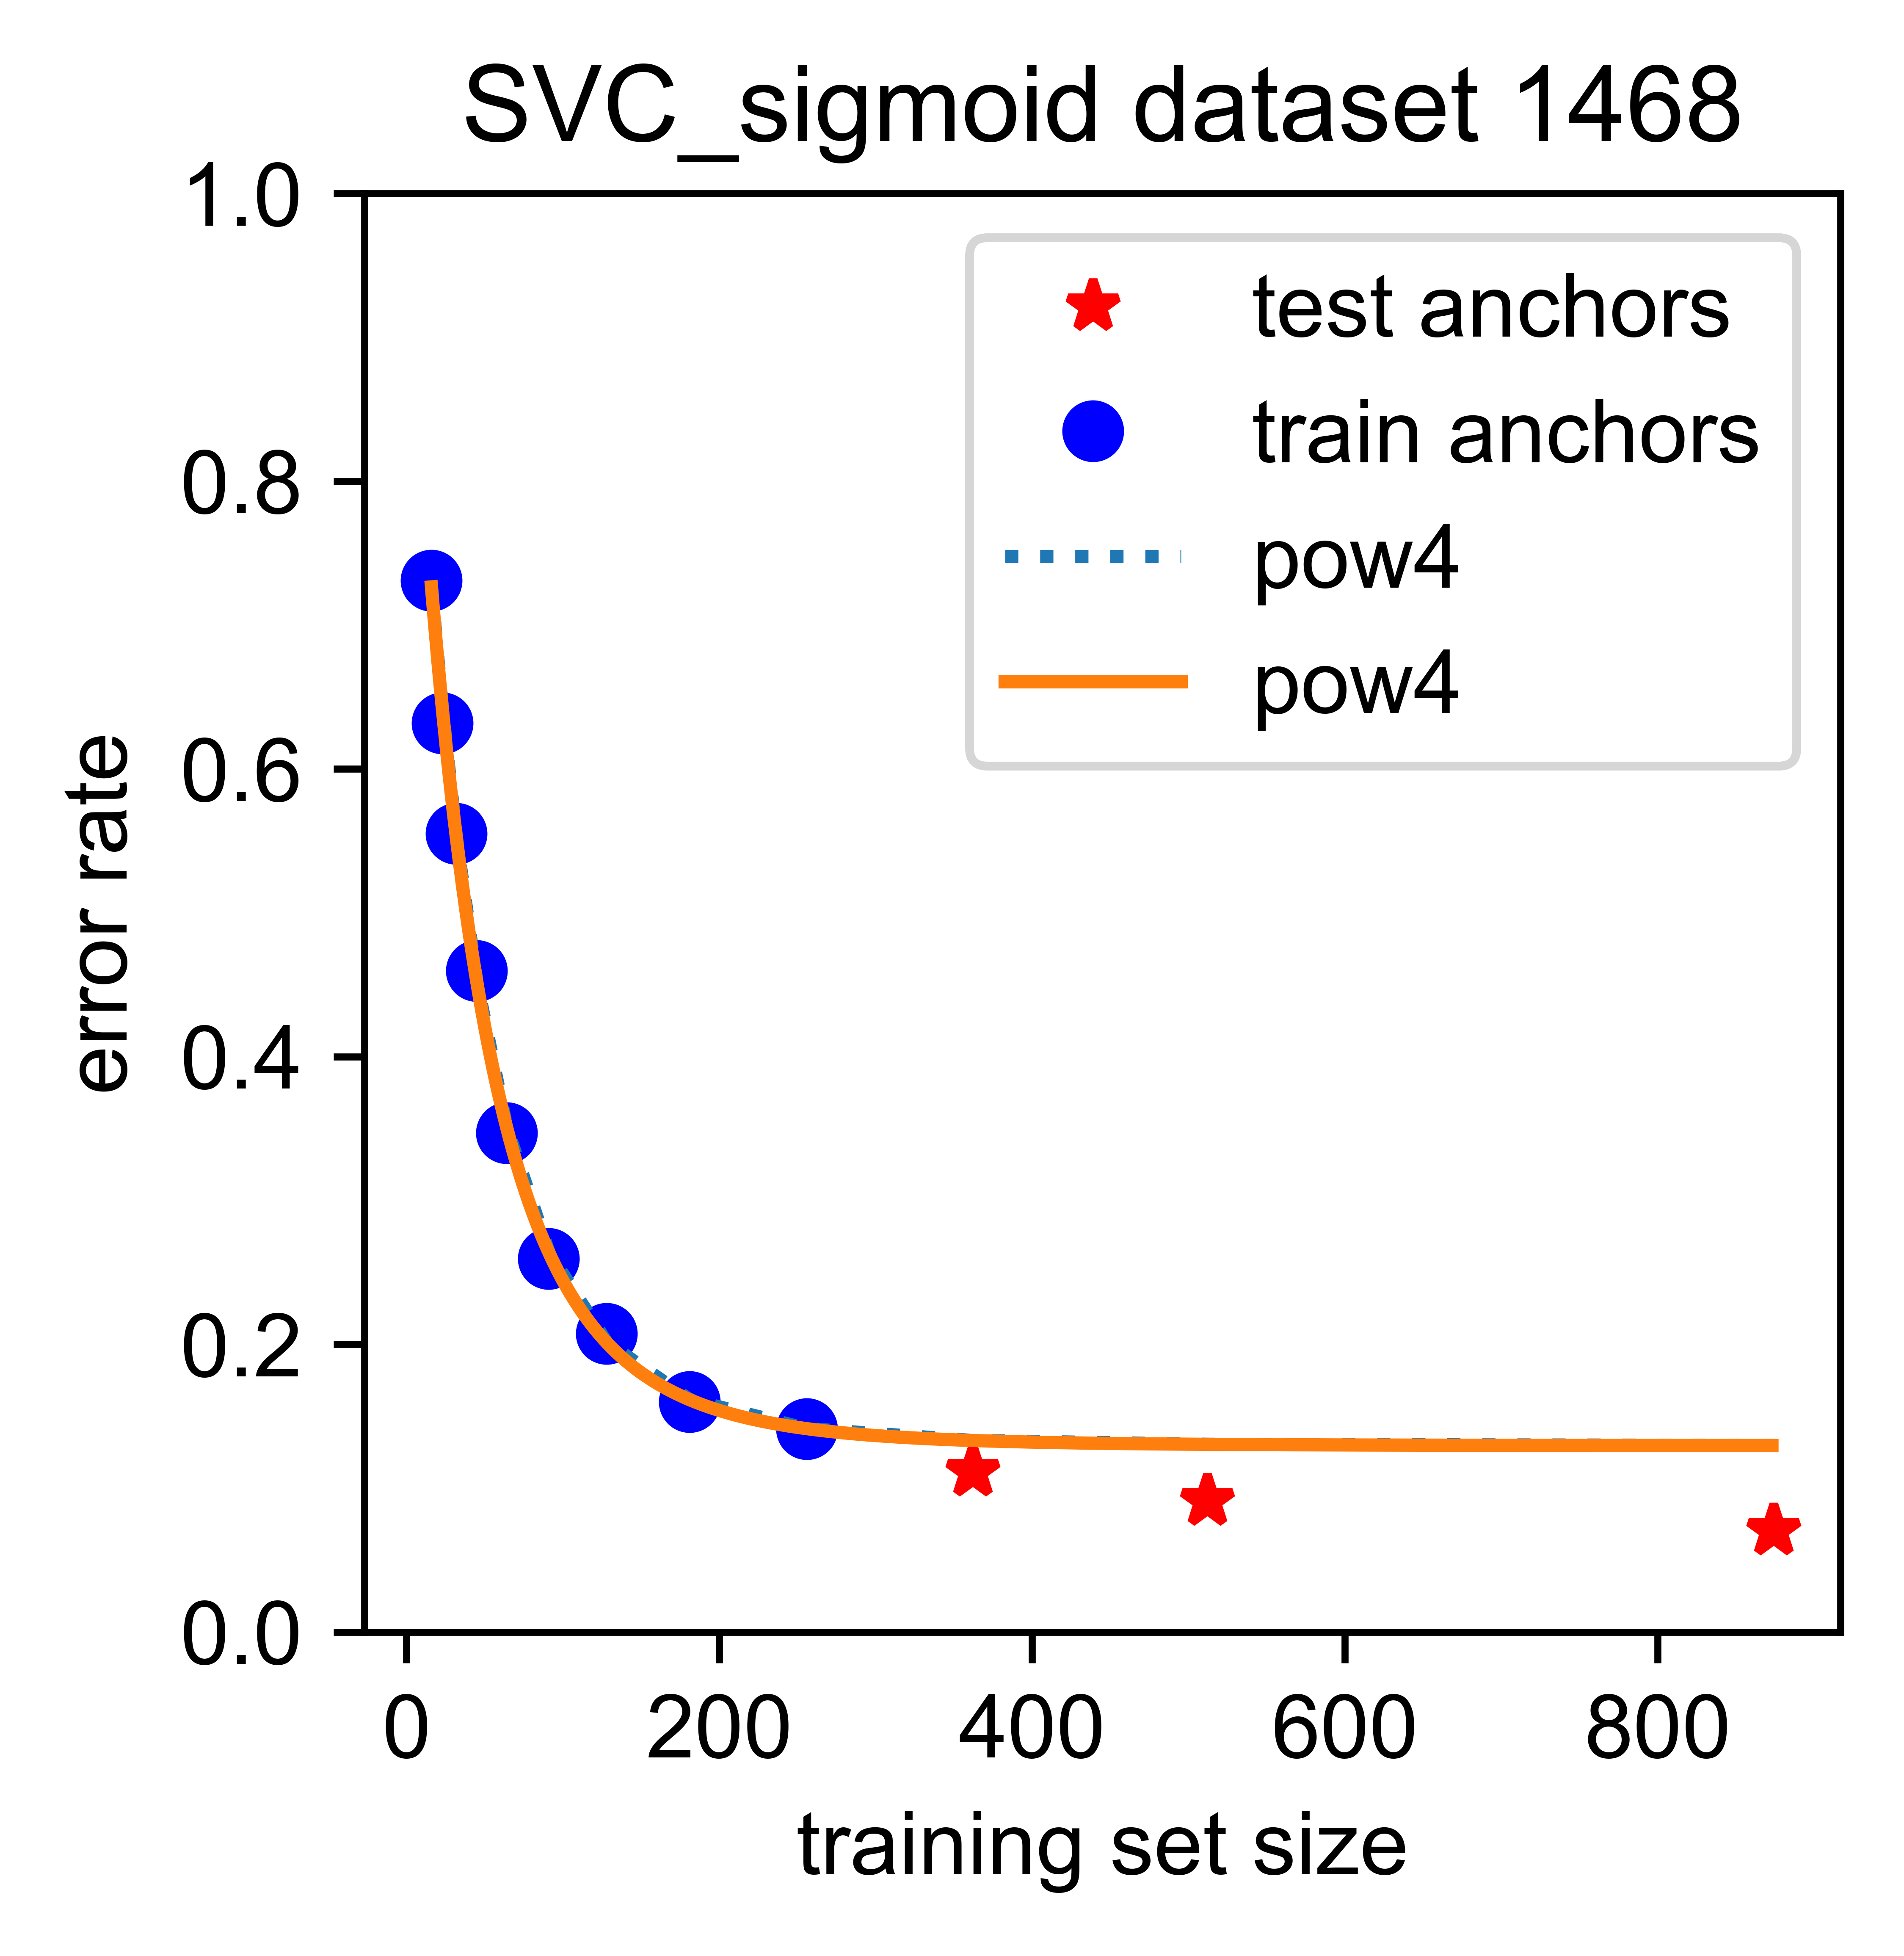

<Figure size 216x216 with 0 Axes>

openmlid                                                          1468
learner                                                    SVC_sigmoid
max_anchor_seen                                                    256
prediction           [0.27314909613237404, 0.35836687556584335, 0.4...
beta                 [0.8703746344590546, 0.000474491935878178, 6.6...
fails_init                                                         0.0
fails_fit                                                            0
MSE_trn                                                       0.000029
MSE_tst                                                        0.00181
MSE_tst_last                                                  0.003445
L1_trn                                                        0.000029
L1_tst                                                         0.00181
L1_tst_last                                                   0.003445
n                                                                    9
curve_

IndexError: single positional indexer is out-of-bounds

In [294]:
from_n = 0
to_n = 100000
df_total1 =df_total2[(df_total2['percentage_bucket']==0.4)]
df_total1 =df_total1[(df_total1['learner']=='SVC_sigmoid')]
df_total1 = df_total1[(df_total1['openmlid']==1468)]
#df_total1 = df_total2['learner']=='SVC_rbf'

df_total = df_total1
for i in range(from_n, to_n):
    num = i
    row = df_total.iloc[num,:]

    print('visualizing the curve fit of row number %d' % num)

    plt.figure(figsize=(3,3))

    # plots all the points on the curve (red stars)
    plot_data2(row)

    # plots the points used for training only (blue dots)
    plot_trn_data2(row)

    # plot the curve fit from the row of the dataframe (dotted)
    plot_prediction2(row)

    # plot the curve fit using the beta parameters in the dataframe (line)
    # this plot is smoother since we can predict any x-value
    # this curve should overlap with the curve plotted previously
    plot_prediction_smooth2(row)
    plt.ylim(ymin=0)
    plt.ylim(ymax=1)
    # show the plot
    #plt.title('sklearn.discriminant_analysis.LinearDiscriminantAnalysis dataset 441142', fontsize=6)

    plt.gcf().set_dpi(1500)
    plt.figure(figsize=(3, 3))

    plt.show()

    # show the information of the row
    print(row)



Let us retrieve the fitted curve model and make a new prediction:

In [59]:
fitted_curve_model = get_fun_model_id(row.beta, row.curve_model)
x_predict = row.anchor_prediction[-1]*2
y_predict = fitted_curve_model(x_predict)
y_predict

1.3353280288247382

# Repeat the fitting procedure
Let us redo a fit to illustrate the fitting procedure.

In [60]:
# get the X and Y values
# X are training set sizes
# Y are accuracies
[X, Y] = get_XY2(row)

# we need to find the training and test set for the curve data, we do that through the offset
offset = np.argwhere(X == row.max_anchor_seen)[0][0]

# curve training data
X_trn_curve = np.array(X[:offset + 1])
Y_trn_curve = np.array(Y[:offset + 1])

# curve testing data
X_tst_curve = np.array(X[offset + 1:])
Y_tst_curve = np.array(Y[offset + 1:])

# fit the curve model again
#Models(row.curve_model, X_trn_curve, Y_trn_curve,X_tst_curve,  "basin")
#[beta_fit_new, fitted_curve_model_new, fails_init, fails_fit] = fit_model(X_trn_curve, Y_trn_curve, X_tst_curve, row.curve_model)

print('best beta found from fitting procedure:')
print(Models(row.curve_model, X_trn_curve, Y_trn_curve,X_tst_curve,  "basin").optimise())
print('the beta provided from toms computations from the paper:')
print(row.beta)

best beta found from fitting procedure:
[-0.11031985  0.3918951 ]
the beta provided from toms computations from the paper:
[-0.11032008  0.39189411]


Note that the first thing I would do to improve the fitting procedure, is to use the analytic Hessian, using the Newton-Conjugate-Gradient algorithm, see
https://docs.scipy.org/doc/scipy/tutorial/optimize.html#newton-conjugate-gradient-algorithm-method-newton-cg
For now I used the least_squares procedure from
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares
it may also be worthwhile to look into the ``loss`` argument for this optimizer. I tried implementing the Jacobian to speed up the optimization, but providing the Jacobian actually made fitting slower (?)


# Fitting many learning curves
The code in ``fit3_students.py`` takes the file ``lcdb_new.csv`` and fits all learning curve models to all datasets. This procedure takes approximately 20-40 hours to complete. That is why ``fit_students.py`` takes as argument part: part is an integer in [0, 9]. The database is splitted in 10 parts. So if part is 0, the first 10% of the database is processed. This takes about 2-4 hours. I will not do that computation here, because it simply takes extremely long. The results of these computations are stored in ``extrapolations$i.p``, ``anchor_scores$i.p``, ``metrics$i.p``, and these were already loaded above using ``load_from_parts()``. Still, to illustrate how this process went, let us fit all curve models for a single dataset.

Let us first read the learning curve database:

In [17]:
df_performances = pd.read_csv("lcdb_new.csv")
df_performances

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
0,6,SVC_linear,16,2000,0,0,1.0000,0.1728,0.1840
1,6,SVC_linear,23,2000,0,0,1.0000,0.1939,0.1975
2,6,SVC_linear,32,2000,0,0,1.0000,0.2400,0.2385
3,6,SVC_linear,45,2000,0,0,0.9556,0.2478,0.2515
4,6,SVC_linear,64,2000,0,0,0.9844,0.3150,0.3030
...,...,...,...,...,...,...,...,...,...
1765441,1566,sklearn.tree.ExtraTreeClassifier,181,122,4,4,1.0000,0.5596,0.4754
1765442,1566,sklearn.tree.ExtraTreeClassifier,256,122,4,4,1.0000,0.5138,0.4836
1765443,1566,sklearn.tree.ExtraTreeClassifier,362,122,4,4,1.0000,0.6239,0.5984
1765444,1566,sklearn.tree.ExtraTreeClassifier,512,122,4,4,1.0000,0.4771,0.5000


The columns are:
- openmlid: the dataset
- learner: the learner trained
- size_train: the maximum number of training sizes used
- size_test: size of the test set
- outer_seed, inner_seed: the seeds that were used to generate the training, validation and test folds (see ECML paper for details)
- score_train: accuracy on train set
- score_valid: accuracy on validation set
- score_test: accuracy on test set

Note that in my experiments, I computed all the learning curves using the validation set, and never used the test sets.

Let us fit all learning curves for a single dataset that is relatively small, to illustrate the process:

In [18]:
df_performances_one_dataset = df_performances.query('openmlid == 6')
df_performances_one_dataset

,openmlid,learner,size_train,size_test,outer_seed,inner_seed,score_train,score_valid,score_test
0,6,SVC_linear,16,2000,0,0,1.0000,0.1728,0.1840
1,6,SVC_linear,23,2000,0,0,1.0000,0.1939,0.1975
2,6,SVC_linear,32,2000,0,0,1.0000,0.2400,0.2385
3,6,SVC_linear,45,2000,0,0,0.9556,0.2478,0.2515
4,6,SVC_linear,64,2000,0,0,0.9844,0.3150,0.3030
...,...,...,...,...,...,...,...,...,...
49185,6,sklearn.tree.ExtraTreeClassifier,2896,2000,4,24,1.0000,0.6656,0.6675
49186,6,sklearn.tree.ExtraTreeClassifier,4096,2000,4,24,1.0000,0.6539,0.6665
49187,6,sklearn.tree.ExtraTreeClassifier,5793,2000,4,24,1.0000,0.7256,0.7350
49188,6,sklearn.tree.ExtraTreeClassifier,8192,2000,4,24,1.0000,0.7867,0.7660


This code below is taken from ``do_job()`` from ``fit3_students.py``.
Note that it will display some warnings, because some of the fits are so bad, that they cause overflows or divisions by zero.
Fitting the curves, computing the metrics, and computing the X, Y values (anchors and scores mean curve) takes about 2 minutes.

In [52]:
print('computing extrapolations...')
# compute the fits
df_extrapolations = get_multiple_extrapolations_mean_curve_robust(df_performances_one_dataset)
df_extrapolations.to_pickle('extrapolations_example.gz', protocol=3)

print('computing anchors and scores...')
# compute the X, Y values and store them for later use
df_anchors_and_scores = get_anchors_and_scores_mean_curve(df_performances_one_dataset)
df_anchors_and_scores.to_pickle('anchors_scores_example.gz', protocol=3)

print('computing metrics....')
# compute the metrics and other information (L2 losses, etc.)
df_metrics = df_compute_metrics_mean_curve(df_extrapolations, df_anchors_and_scores)
df_metrics.to_pickle('metrics_example.gz', protocol=3)

computing extrapolations...


NameError: name 'df_performances_one_dataset' is not defined

Now you have seen how the fitting procedure was done on all the learning curves. Let us now go back to the complete database and do some analysis.

# Cleaning
As you have seen, many of the learning curve fits didn't succeed. That is why we removed some fits that we deemed 'bad'. The criteria for removal are:
- the fitting had to be restarted more than 100 times to get a decent solution (e.g. we gave up trying to perform fitting to avoid infinite loop), we denote this reason as ``fail``.
- we had to try more than 1000 initial points for the fitting to get started at all (also to avoid infinite loops). note that this never happened in any of the experiments. we denote this reason also as ``fail`` if it would ever occur.
- after the fitting has converged, the best solution obtained Nan or Inf values when extrapolating or interpolating the learning curve, we denote this reason as  ``nan_or_inf``
- the MSE on the train, test or test last point was larger than 100 (some performances are so large that they may cause buffer overflows?) we denote this reason as ``too_bad``


In [337]:
[df_clean, df_removed] = remove_bad_fits(df_total)

fail due to init 0
fail due to fit 0
fail total 0
number of rows with nans / infs: 0
columns with nans / infs:
openmlid           False
learner            False
max_anchor_seen    False
fails_init         False
fails_fit          False
MSE_trn            False
MSE_tst            False
MSE_tst_last       False
dtype: bool
performance too bad for analysis:
MSE_trn         0
MSE_tst         0
MSE_tst_last    0
dtype: int64
number of offending rows:
0


Lets have a look what was removed and why:

In [338]:
failed_fits_statistics(df_removed)

,curve_model,fail,nan_or_inf,too_bad,total
0,all,0.0,0.0,0.0,0.0


# Group results together
For the analysis it is sometimes useful to group all results together, we do that here. Note that this computation takes quite some time: 15 min per performance metric. So I've pickled the results for you.

In [13]:


[table_MSE_tst_last,table_MSE_tst , table_MSE_trn] = load_from_parts_example_gathered_result()


Let us look at the resulting tables. For example, let us look at ``table_MSE_tst_last``. This table lists all MSE's for extrapolating to the last point for all experiments (including nans). See below how the new dataframe looks like:

In [14]:
table_MSE_tst

,openmlid,learner,n,bucket,percentage,pow4,pow3,pow2,log2,exp2,...,lin2,last1,vap3,mmf4,wbl4,exp4,expp3,ilog2,expd3,logpower3
0,3,SVC_linear,4,0.05,0.01738794435857805,0.034618,0.034983,0.112030,0.225435,11.038576,...,19.004238,0.014998,0.112970,0.034747,0.034607,0.009205,0.000188,0.044864,11.038576,0.006102
1,3,SVC_linear,5,0.05,0.02472952086553323,0.129146,0.129189,0.060167,0.220607,6.788363,...,NaN,0.007701,0.093124,0.029051,0.029138,0.010248,0.000597,0.015853,6.788363,0.002362
2,3,SVC_linear,6,0.05,0.03516228748068006,0.023420,0.023420,0.099420,0.212870,NaN,...,NaN,0.004138,0.018713,0.024865,0.024582,0.000699,0.000593,0.006388,NaN,0.001300
3,3,SVC_linear,7,0.05,0.04945904173106646,0.079009,0.079008,0.099007,0.204145,NaN,...,NaN,0.001975,0.037077,0.020829,0.020700,0.000051,0.000709,0.002667,NaN,0.000419
4,3,SVC_linear,8,0.1,0.06993817619783617,0.036340,0.036340,0.072860,0.194847,0.018636,...,NaN,0.000740,0.012294,0.017279,0.017291,0.000021,0.001341,0.001035,0.018636,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,299,sklearn.linear_model.Perceptron,5,0.4,0.21993127147766323,0.013578,0.013578,0.006287,0.001033,0.004800,...,1.480653,0.008907,0.013442,0.015530,0.015210,0.002128,0.007739,0.018309,0.004800,0.010236
1699,300,sklearn.linear_model.Perceptron,4,0.05,0.007125890736342043,0.052495,0.052497,0.078168,0.031351,NaN,...,0.722940,0.204329,0.526882,0.294457,0.293110,0.148460,0.211601,0.259071,NaN,0.253574
1700,300,sklearn.linear_model.Perceptron,5,0.05,0.010134600158353128,0.039610,0.039541,0.050179,0.017053,NaN,...,NaN,0.170597,0.139846,0.282500,0.281418,0.067419,0.176236,0.167341,NaN,0.234651
1701,336,sklearn.linear_model.SGDClassifier,4,0.4,0.20833333333333334,0.000129,0.000129,0.000084,0.105715,0.000226,...,1.692067,0.000567,0.007951,0.000128,0.000129,0.003595,0.000214,0.001046,0.000226,0.000171


The nans occur because some of the curve models did not find a good fit (and were removed during cleaning), but because of the grouping they popped up again. We can remove rows with any nans as follows.

In [15]:
table_MSE_tst_last_no_nan_or_inf = remove_rows_with_nan_or_inf(table_MSE_tst_last)
table_MSE_tst_last_no_nan_or_inf

,openmlid,learner,n,bucket,percentage,pow4,pow3,pow2,log2,exp2,...,lin2,last1,vap3,mmf4,wbl4,exp4,expp3,ilog2,expd3,logpower3
6,3,SVC_linear,10,0.2,0.13987635239567234,0.003060,0.003060,0.089917,0.291871,1.515375e-02,...,0.940059,0.000385,0.035288,0.088159,0.013941,0.000022,2.927869e-04,7.797630e-06,1.515375e-02,0.000244
7,3,SVC_linear,11,0.2,0.19783616692426584,0.002018,0.002018,0.002990,0.246725,1.290492e-02,...,0.940059,0.000185,0.025620,0.237012,0.011788,0.000054,2.367726e-04,3.140636e-09,1.290492e-02,0.000319
8,3,SVC_linear,12,0.4,0.2797527047913447,0.035738,0.035738,0.001988,0.186123,1.110912e-02,...,0.940059,0.000104,0.020496,0.010352,0.010074,0.000016,1.628173e-04,5.922093e-07,1.110912e-02,0.000360
9,3,SVC_linear,13,0.4,0.3956723338485317,0.023283,0.023283,0.001244,0.132971,9.664838e-03,...,0.940059,0.000068,0.015335,0.008931,0.008701,0.000039,1.322389e-04,2.332782e-08,9.664838e-03,0.000341
10,3,SVC_linear,14,0.8,0.5595054095826894,0.013705,0.013705,0.000418,0.095545,8.454561e-03,...,0.940059,0.000018,0.012697,0.007727,0.007555,0.000061,3.262156e-04,6.253273e-07,8.454561e-03,0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,188,sklearn.linear_model.SGDClassifier,5,0.2,0.10756302521008404,0.008244,0.008244,0.000018,0.039249,1.937221e-02,...,4.007360,0.002887,0.025228,0.008381,0.008244,0.000057,5.361312e-03,1.172825e-02,1.937221e-02,0.001876
1697,299,sklearn.linear_model.Perceptron,4,0.2,0.15463917525773196,0.023391,0.023391,0.010908,0.002135,1.739436e-03,...,2.084958,0.013542,0.026531,0.023817,0.023391,0.001621,1.075664e-02,2.803060e-02,1.739436e-03,0.015637
1698,299,sklearn.linear_model.Perceptron,5,0.4,0.21993127147766323,0.018755,0.018755,0.007771,0.001442,3.211005e-03,...,2.972591,0.013261,0.018731,0.021520,0.021132,0.001829,1.096116e-02,2.523745e-02,3.211005e-03,0.013755
1701,336,sklearn.linear_model.SGDClassifier,4,0.4,0.20833333333333334,0.000025,0.000025,0.000100,0.211948,3.314404e-11,...,4.465620,0.000100,0.011843,0.000026,0.000025,0.006900,2.699033e-07,6.708699e-04,3.314404e-11,0.000006


Note that, if we remove a nan row from this dataframe, we can loose quite a lot of information, since only 1 fit has to fail for an entire row to be discarded. So it may not be the best option to remove rows like this... I avoided doing this whenever I could in our paper.